<a href="https://colab.research.google.com/github/limminxian/DAC_residential/blob/main/99co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bs4 selenium

     |████████████████████████████████| 968 kB 5.1 MB/s 
     |████████████████████████████████| 359 kB 53.7 MB/s 
     |████████████████████████████████| 138 kB 54.6 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 3.6 MB 56.8 MB/s 
     |████████████████████████████████| 58 kB 4.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install webdriver-manager

     |████████████████████████████████| 127 kB 5.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.3 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install --upgrade requests

     |████████████████████████████████| 63 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.utils import ChromeType
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
# from lxml import etree
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [38]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [16]:
driver.get("https://www.99.co/singapore/sale/hdb")
links=[]
count = 0
while True:
  soup = BeautifulSoup(driver.page_source, 'lxml')
  time.sleep(5)
  linkclass = soup.find_all('a', class_='_3Ajbv _30I97 _1vzK2')
  for l in linkclass:
    links.append(l['href'])
  try:
    nextbutton = "https://www.99.co" + soup.find('li', class_='next').find('a')['href']
    driver.get(nextbutton)
    count+=1
  except:
    driver.refresh()
  time.sleep(5)
  if count==1:
    break


In [4]:
print(linkclass)

[<a class="_3Ajbv _30I97 _1vzK2" href="/singapore/sale/property/265c-compassvale-link-hdb-mUfUEzvfkr52ofUnV455pr#enquiry_position--106+enquiry_source--Search" rel="noopener noreferrer" target="_blank">3 Room HDB in 265C Compassvale Link</a>, <a class="_3Ajbv _30I97 _1vzK2" href="/singapore/sale/property/49-strathmore-avenue-hdb-VgRd8YKL74BReaPcfmVSc9#enquiry_position--107+enquiry_source--Search" rel="noopener noreferrer" target="_blank">5 Room HDB in 49 Strathmore Avenue</a>, <a class="_3Ajbv _30I97 _1vzK2" href="/singapore/sale/property/68-telok-blangah-heights-hdb-M9VXLSvypFY8QHafHnPyNZ#enquiry_position--108+enquiry_source--Search" rel="noopener noreferrer" target="_blank">3 Room HDB in 68 Telok Blangah Heights</a>, <a class="_3Ajbv _30I97 _1vzK2" href="/singapore/sale/property/312c-clementi-avenue-4-hdb-ERKc3i9y732CQ3fXhFHvsL#enquiry_position--109+enquiry_source--Search" rel="noopener noreferrer" target="_blank">3 Room HDB in 312C Clementi Avenue 4</a>, <a class="_3Ajbv _30I97 _1vzK

In [17]:
page_source = []
t_page_source=[]
for link in links:
    driver.get("https://www.99.co" + link)
    while True:
    # time.sleep(5)
      soup = BeautifulSoup(driver.page_source, "lxml")
      trans = soup.find(id="transactions")
      t_page_source.append(trans) 
      try:
        # nextbutton = soup.find('li', class_='RIVsn')
        t_nextbutton = driver.find_element(By.CLASS_NAME,"RIVsn")
        t_nextbutton.click()
        time.sleep(5)
      except:
        break
    time.sleep(10)
    page_source.append(soup) 

KeyboardInterrupt: ignored

In [21]:
t_page_source

[None,
 None,
 None,
 None,
 <div class="_3nnOD" id="transactions"><div><h3 class="_2tvJd _1tbEg lFqTi _1vzK2">Transaction history</h3><div class="_yHd0"><div class="_20eVB"><p class="dniCg _33U7q _2rhE-" data-tracking='{"value":"Sale"}'>Sale</p><p class="dniCg _1AoIA _2rhE-" data-tracking='{"value":"Rent"}'>Rent</p></div><div class="_28YGE" id="price-trend-stats"><div class="_2dFlr"><p class="_2y86Q _2rhE-"><span class="_2j1I_ _3wNUq">Last 1 year</span></p><div class="_1zGm8 _1j2Vp _1vzK2"><span class="wc31-">S$418.00</span></div><p class="_2y86Q _27gkw _2rhE-">Avg. price (psf)</p></div></div></div><div class="s064i _1VpF0" style="height: 360px;"><table class="_3Qf5K _2PIEX" itemscope="" itemtype="http://schema.org/Table"><thead class="_1w-j5"><tr class="_1kKgW"><th class="_1gScH _2HRB2 _2WB19" style="text-align: left;">Date <br/></th><th class="_1gScH _2HRB2 _2WB19" style="text-align: left;">Block <br/></th><th class="_1gScH _2HRB2 _2WB19" style="text-align: right;">Unit <br/></th><t

In [50]:
import re
import pandas as pd

data = {'price':  [],
        'location': [],
        'bedrooms':[],
        'bathroom':[],
        'sqrf':[],
        'distance':[],
        'buildyear':[],
        'tenure':[]
        }
t_data = {'Date' : [],
                   'Block' : [],
                   'Areasqft' : [],
                   'Areasqm' : [],
                   'Price' : [],
                   'Pricesf' : []
                   }
df = pd.DataFrame(data)
df2 = pd.DataFrame(t_data)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
for page in page_source:
  dis = page.find('div',class_='UUAXj')
  if dis is not None:
    distance = int(dis.find('p',class_='_2sIc2 _2rhE- _1c-pJ').find('span').get_text().split(' ', 1)[0])
  else:
    distance = None
  p = int(re.sub('[,]', '', page.find('p',class_='_1zGm8 _3na6W _1vzK2').get_text()[1:]))
  l = page.find('p',class_='dniCg _3j72o _2rhE-').find('span').get_text()[-4:]
  l = int(l.replace(" ", '').replace("D", '').replace("(", '').replace(")", ''))
  bbs = page.find_all('p',class_='_2sIc2 _29qfj _2rhE-')
  b = int(bbs[0].get_text()[:-4].replace(" ", ''))
  ba = int(bbs[1].get_text()[:-5].replace(" ", ''))
  s = int(re.sub('[,]', '',bbs[2].get_text()[:-5]))
  year = page.find(text="Built year")
  if year is not None:
    y = int(year.parent.findNext('div').contents[0])
  else:
    y = None
  tenure = page.find(text="Tenure")
  if tenure is not None:
    t = int(tenure.parent.findNext('div').contents[0][:-15])
  else:
    t = None
  df=df.append( {'price':p, 'location':l, 'bedrooms':b, 'bathroom':ba, 'sqrf': s, 'distance':distance, 'buildyear':y, 'tenure':t}, ignore_index=True)

for t in t_page_source:
  if t!= None:
    row1 = t.find_all('tr',class_="_3zkEn _1kKgW")
    row2 = t.find_all('tr',class_="_1kKgW")
    t_data = []
    for r in row1:
      t_data.append( r.find_all('td',class_="gcin4 _2kf8F"))
    for r in row2:
      t_data.append( r.find_all('td',class_="gcin4 _2kf8F"))
    for a in t_data:
      for r in range(len(a)):
        if(r==0):
          d = int(a[r].get_text()[3:])
        elif(r==1):
          b = a[r].get_text()
        elif(r==3):
          x = a[r].get_text().split(" ")
          af = int(x[0].replace(',', ''))
          am = float(x[2])
        elif(r==4):
          x = a[r].get_text().split(" ")
          p = int(x[0][2:].replace(',', ''))
          pf = float(x[1][3:])
      df2=df2.append({'Date' : d,'Block' : b,'Areasqft' : af, 'Areasqm' : am, 'Price' : p, 'Pricesf' : pf}, ignore_index=True)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      334 non-null    float64
 1   Block     334 non-null    object 
 2   Areasqft  334 non-null    float64
 3   Areasqm   334 non-null    float64
 4   Price     334 non-null    float64
 5   Pricesf   334 non-null    float64
dtypes: float64(5), object(1)
memory usage: 15.8+ KB


In [51]:
df.info()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
encoder = OrdinalEncoder()
df['distance'] = imputer.fit_transform(df[['distance']])
df['buildyear'] = imputer.fit_transform(df[['buildyear']])
df['tenure'] = imputer.fit_transform(df[['tenure']])
df2['Block'] = encoder.fit_transform(df2[['Block']])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      20 non-null     float64
 1   location   20 non-null     float64
 2   bedrooms   20 non-null     float64
 3   bathroom   20 non-null     float64
 4   sqrf       20 non-null     float64
 5   distance   15 non-null     float64
 6   buildyear  16 non-null     float64
 7   tenure     14 non-null     float64
dtypes: float64(8)
memory usage: 1.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      334 non-null    float64
 1   Block     334 non-null    float64
 2   Areasqft  334 non-null    float64
 3   Areasqm   334 non-null    float64
 4   Price     334 non-null    float64
 5   Pricesf   334 non-null    float64
dtypes: float64(6)
memory usage: 15.8 KB


In [48]:
t_page_source

[None,
 None,
 None,
 None,
 <div class="_3nnOD" id="transactions"><div><h3 class="_2tvJd _1tbEg lFqTi _1vzK2">Transaction history</h3><div class="_yHd0"><div class="_20eVB"><p class="dniCg _33U7q _2rhE-" data-tracking='{"value":"Sale"}'>Sale</p><p class="dniCg _1AoIA _2rhE-" data-tracking='{"value":"Rent"}'>Rent</p></div><div class="_28YGE" id="price-trend-stats"><div class="_2dFlr"><p class="_2y86Q _2rhE-"><span class="_2j1I_ _3wNUq">Last 1 year</span></p><div class="_1zGm8 _1j2Vp _1vzK2"><span class="wc31-">S$418.00</span></div><p class="_2y86Q _27gkw _2rhE-">Avg. price (psf)</p></div></div></div><div class="s064i _1VpF0" style="height: 360px;"><table class="_3Qf5K _2PIEX" itemscope="" itemtype="http://schema.org/Table"><thead class="_1w-j5"><tr class="_1kKgW"><th class="_1gScH _2HRB2 _2WB19" style="text-align: left;">Date <br/></th><th class="_1gScH _2HRB2 _2WB19" style="text-align: left;">Block <br/></th><th class="_1gScH _2HRB2 _2WB19" style="text-align: right;">Unit <br/></th><t

In [42]:
df2

,Date,Block,Areasqft,Areasqm,Price,Pricesf
0,2010.0,4.0,1927.0,179.0,30000.0,275.04
1,2009.0,4.0,743.0,69.0,28000.0,306.86
2,2009.0,4.0,1905.0,177.0,10000.0,267.72
3,2008.0,4.0,1905.0,177.0,48000.0,235.17
4,2007.0,4.0,1905.0,177.0,5000.0,212.60
5,2006.0,4.0,1894.0,176.0,85000.0,203.27
6,2006.0,4.0,1905.0,177.0,70000.0,194.23
7,2004.0,4.0,1464.0,136.0,20000.0,218.58
8,2003.0,4.0,1464.0,136.0,82000.0,192.62
9,2003.0,4.0,1905.0,177.0,10000.0,215.22


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

In [52]:
df2['Price'].describe()

count       334.000000
mean     475068.419162
std      174175.760683
min      110000.000000
25%      343000.000000
50%      435000.000000
75%      635000.000000
max      890000.000000
Name: Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


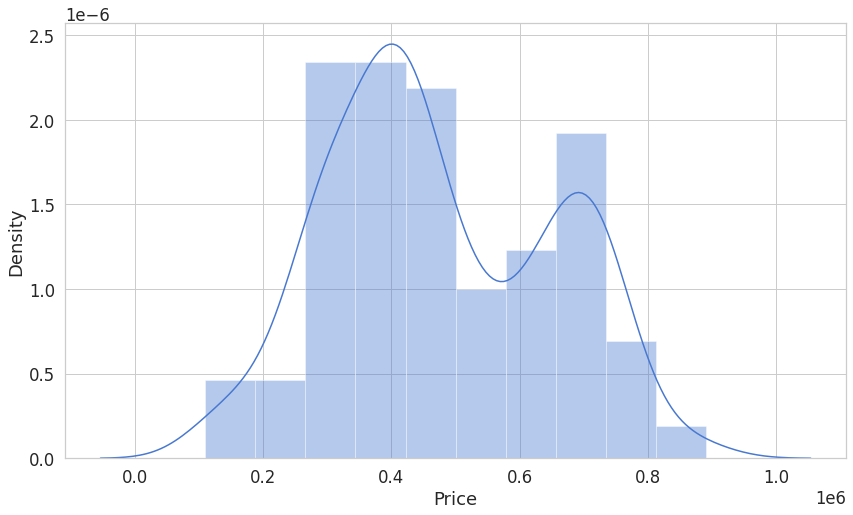

In [53]:
sns.distplot(df2['Price']);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


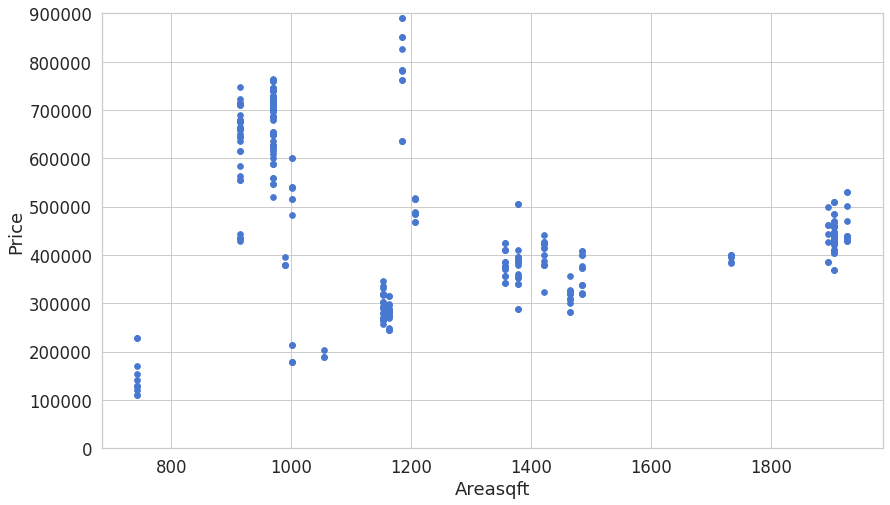

In [58]:
var = 'Areasqft'
data = pd.concat([df2['Price'], df2[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,900000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


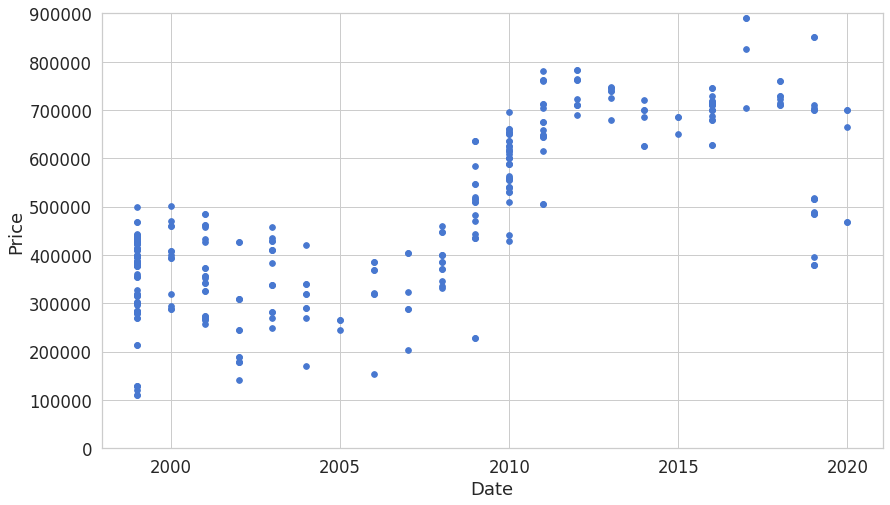

In [63]:
var = 'Date'
data = pd.concat([df2['Price'], df2[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,900000), s=32);

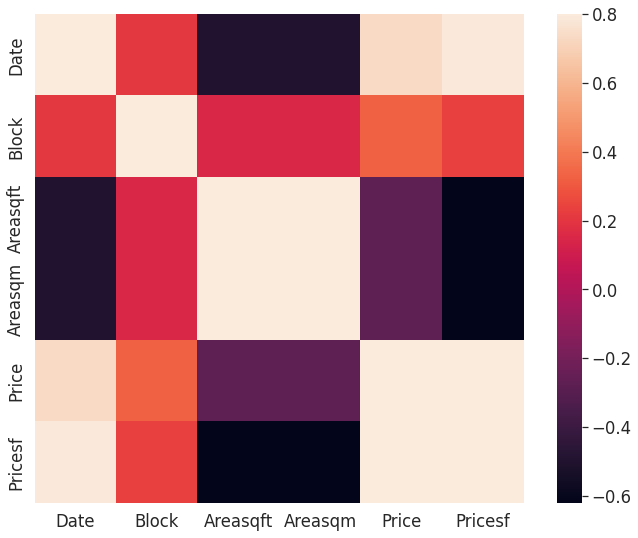

In [60]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

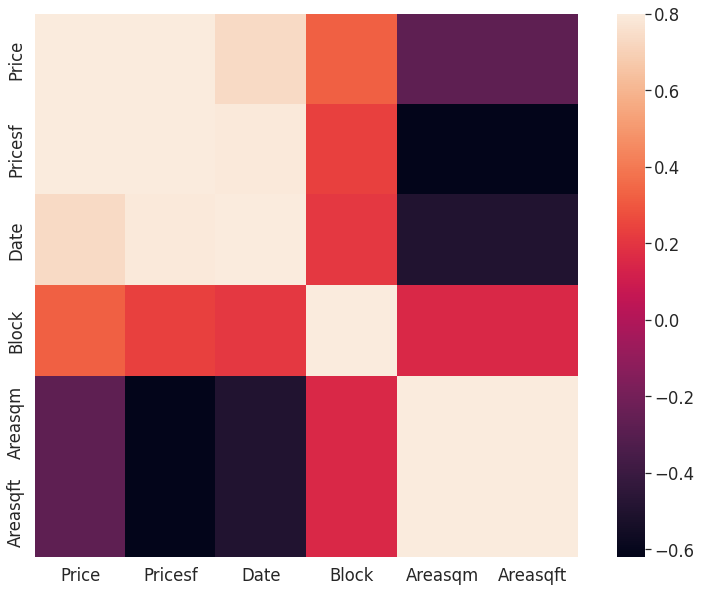

In [62]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df2[cols].corr(), vmax=.8, square=True);

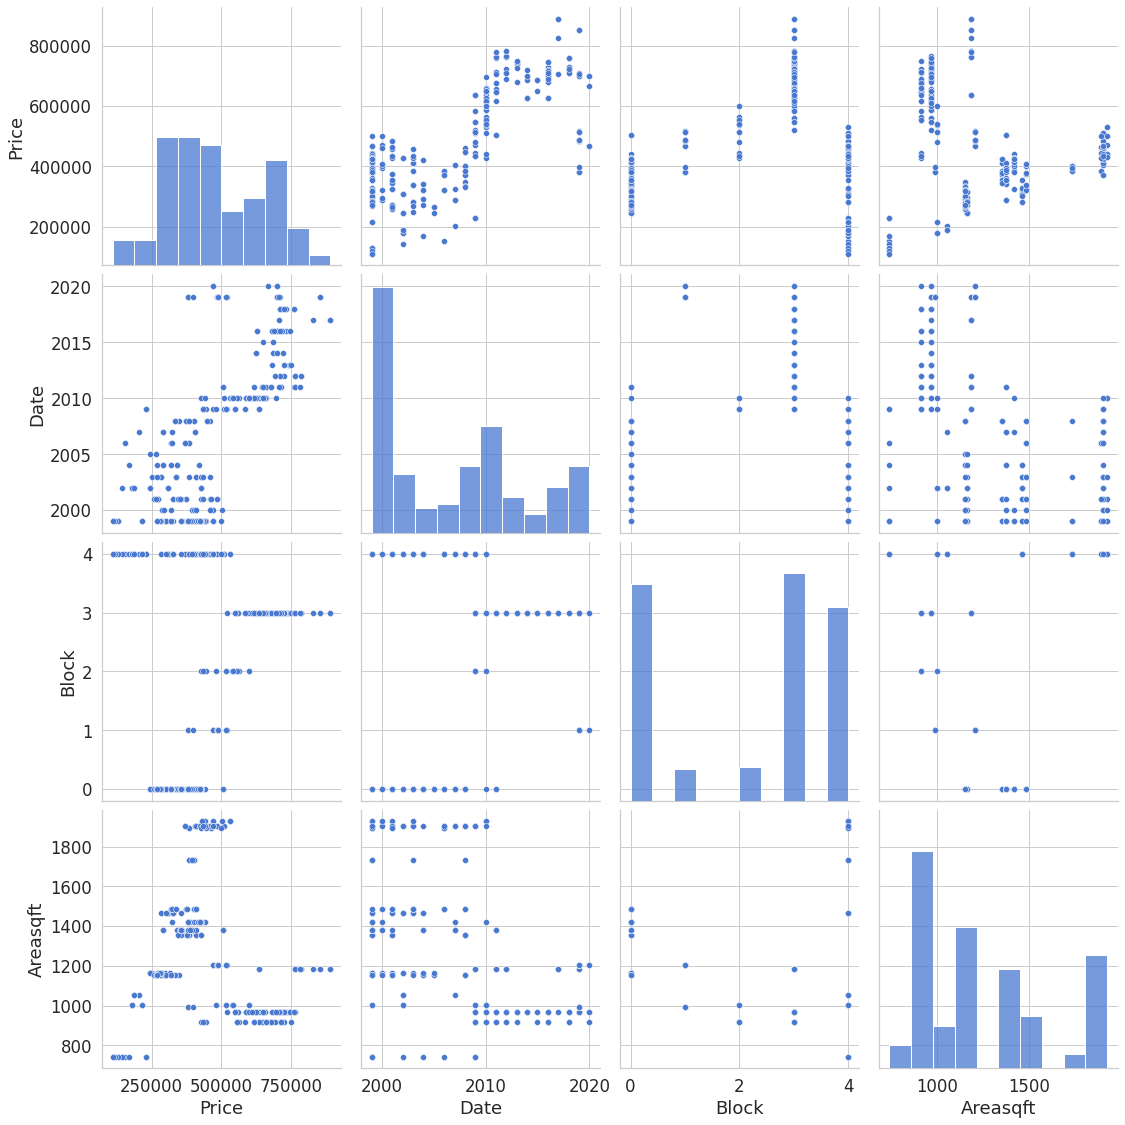

In [66]:
cols = ['Price', 'Date', 'Block', 'Areasqft']
sns.pairplot(df2[cols], height = 4);

In [104]:
pip install scikit_optimize

     |████████████████████████████████| 100 kB 3.9 MB/s 


In [105]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import StratifiedKFold,train_test_split

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.feature_selection import SelectFromModel 
from sklearn.decomposition import TruncatedSVD
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [106]:
def select_model(model_name,col_transform,selector=False,dim_red=False):
    '''
    model_name: Call the regressor
    col_transform: Specify the ColumnTransformer method
    selector: If True, introduce SelectFromModel into the pipeline.
    dim_red: If True, introduce TruncatedSVD into the pipeline
    '''
    
    if (selector==True & dim_red==True):
        param_list=[('prep', col_transform),
                       ("select", SelectFromModel(model_name,max_features=1,threshold=-np.inf)),
                    ('reduct',TruncatedSVD()),
                       ('model',model_name)]

    elif selector==True:
        param_list=[('prep', col_transform),
                       ('select', SelectFromModel(model_name,max_features=1,threshold=-np.inf)),
                       ('model',model_name)]
        
    elif dim_red==True:
        param_list=[('prep', col_transform),
                       ('reduct',TruncatedSVD()),
                       ('model',model_name)]
       
    else:
        param_list=[('prep', col_transform),
                       ('model',model_name)]
    
    pipe = Pipeline(steps=param_list)
    return pipe

In [112]:
train_x=df2.iloc[:,:-1]
train_y=pd.DataFrame(df2['Price'])

numerical_ix = train_x.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = train_x.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=0)

In [113]:
t1 = [('cat', OneHotEncoder(handle_unknown = "ignore"), categorical_ix), 
     ('num', StandardScaler(), numerical_ix)]

col_transform1 = ColumnTransformer(transformers=t1)

In [118]:
train_x=df2.iloc[:,:-1]
train_y=pd.DataFrame(df2['Price'])
numerical_ix = train_x.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = train_x.select_dtypes(include=['object', 'bool']).columns
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=0)
#Transformers used in the first experiment:
t1 = [('cat', OneHotEncoder(handle_unknown = "ignore"), categorical_ix), 
     ('num', StandardScaler(), numerical_ix)]
col_transform1 = ColumnTransformer(transformers=t1)

In [123]:
#The following function called "select_model" is going to retun the pipeline used in each estimation.
def select_model(model_name,col_transform,selector=False,dim_red=False):
    '''
    model_name: Call the regressor
    col_transform: Specify the ColumnTransformer method
    selector: If True, introduce SelectFromModel into the pipeline.
    dim_red: If True, introduce TruncatedSVD into the pipeline
    '''
    
    if (selector==True & dim_red==True):
        param_list=[('prep', col_transform),
                       ("select", SelectFromModel(model_name,max_features=1,threshold=-np.inf)),
                    ('reduct',TruncatedSVD()),
                       ('model',model_name)]
    elif selector==True:
        param_list=[('prep', col_transform),
                       ('select', SelectFromModel(model_name,max_features=1,threshold=-np.inf)),
                       ('model',model_name)]
        
    elif dim_red==True:
        param_list=[('prep', col_transform),
                       ('reduct',TruncatedSVD()),
                       ('model',model_name)]
       
    else:
        param_list=[('prep', col_transform),
                       ('model',model_name)]
    
    pipe = Pipeline(steps=param_list)
    return pipe
#Hyperparameter tuning with BayesSearchCV:
params={"model__max_depth":Integer(10,800),
       "model__max_features":Real(0.5,1),
       "reduct__n_components":Integer(2,40)}
result_dt = BayesSearchCV(estimator=select_model(DecisionTreeRegressor(),col_transform1,dim_red=True),search_spaces=params,cv=3,n_iter=300,
scoring='neg_root_mean_squared_error',
return_train_score=True)
result_dt.fit(X_train,y_train.values.ravel())

In [130]:
params={"model__bootstrap":[True,False],
       "model__max_depth":Integer(3,100),
       "model__n_estimators":Integer(100,1000),
       "model__max_features":Real(0.5,1),
       "model__max_samples":Real(0.5,0.99),
       "reduct__n_components":Integer(2,40)}

result_rf = BayesSearchCV(estimator=select_model(RandomForestRegressor(),col_transform1,dim_red=True),
                             search_spaces=params, 
                             cv=3,
                             n_iter=300,
                            scoring='neg_root_mean_squared_error',iid=False,return_train_score=True)

result_rf.fit(X_train,y_train.values.ravel())

print(result_rf.best_params_)
print(-result_rf.best_score_)

/usr/local/lib/python3.7/dist-packages/skopt/searchcv.py:300: UserWarning: The `iid` parameter has been deprecated and will be ignored.
  warnings.warn("The `iid` parameter has been deprecated "


ValueError: ignored

In [128]:
cv_result=[result_dt,result_rf]
models=["DT","RF","EXT","GBR","ADA","XGB"]
results_1 = pd.DataFrame()
for i,j in zip(cv_result,models):
    results_1.loc[j,'RMSE train']=mean_squared_error(y_train,i.predict(X_train),squared=False)
    results_1.loc[j,'RMSE Val']=(i.best_score_)*(-1)
    results_1.loc[j,'RMSE test']=mean_squared_error(y_test,i.predict(X_test),squared=False)
#Difference between RMSE of the training set and the test set to see how far they are from one of another
results_1['Dif']=results_1['RMSE train']-results_1['RMSE test']
results_1['Best params']=0
results_1['Best params'] = results_1['Best params'].astype(object)
#Best hyperparameters selected by the Bayesian Search
for i,j in zip(cv_result,models):
    results_1.at[j,'Best params']=list(i.best_params_.items())
results_1



NotFittedError: ignored

In [67]:
x = df2['Date']
y = df2['Price']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [69]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [70]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [71]:
run_tests()

.....
----------------------------------------------------------------------
Ran 5 tests in 0.040s

OK


In [72]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._w_history = [self._W]
    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = loss(prediction, y)
        
        self._cost_history.append(cost)
        
        self._gradient_descent_step(x, y, lr)
        
        self._w_history.append(self._W.copy())
    return self

In [79]:
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegression()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([475068.418276,  128688.679449]))

In [80]:
run_tests()

......
----------------------------------------------------------------------
Ran 6 tests in 1.178s

OK


In [81]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [82]:
clf._W

array([475068.41827627, 128688.67944948])

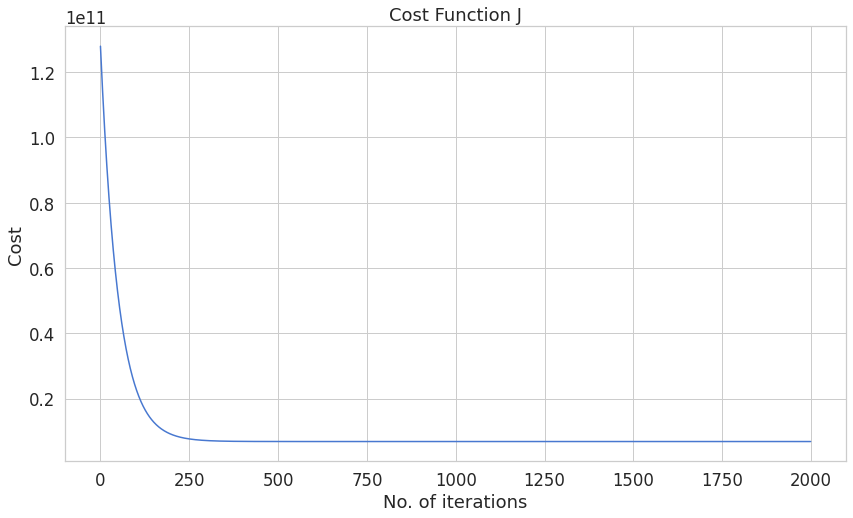

In [83]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [84]:
clf._cost_history[-1]

6867586280.477292

In [85]:
x = df2[['Areasqft', 'Block']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [86]:
clf._W

array([475068.41827626, -57784.0625507 ,  65857.06628492])

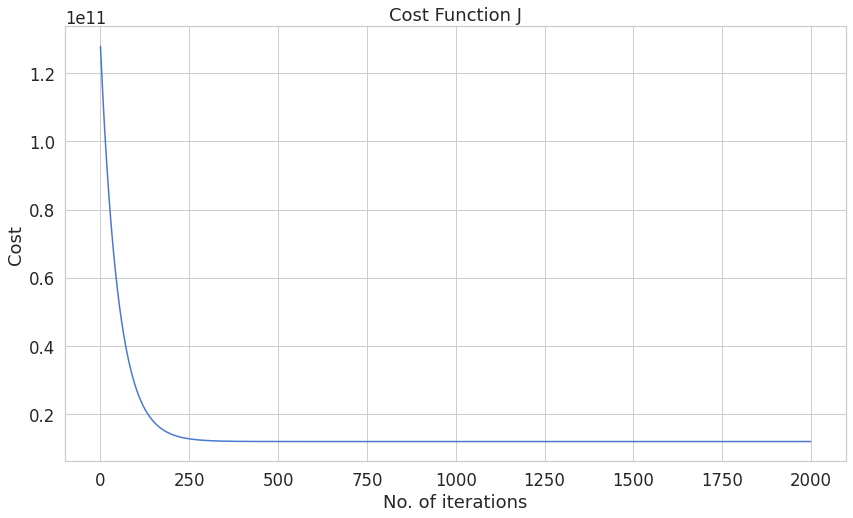

In [87]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [88]:
clf._cost_history[-1]

11880852074.17893

In [93]:
x = df2[['Areasqft']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)
clf._cost_history[-1]

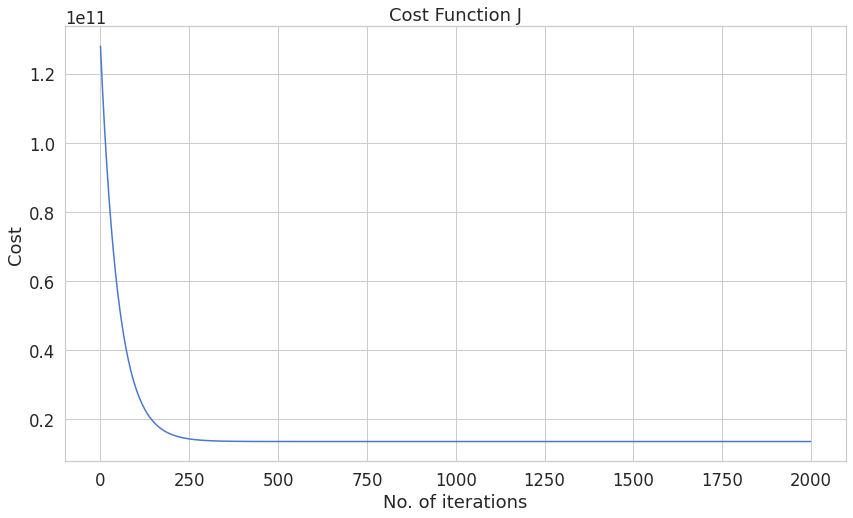

In [97]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [95]:
x = df2[['Block']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)
clf._cost_history[-1]

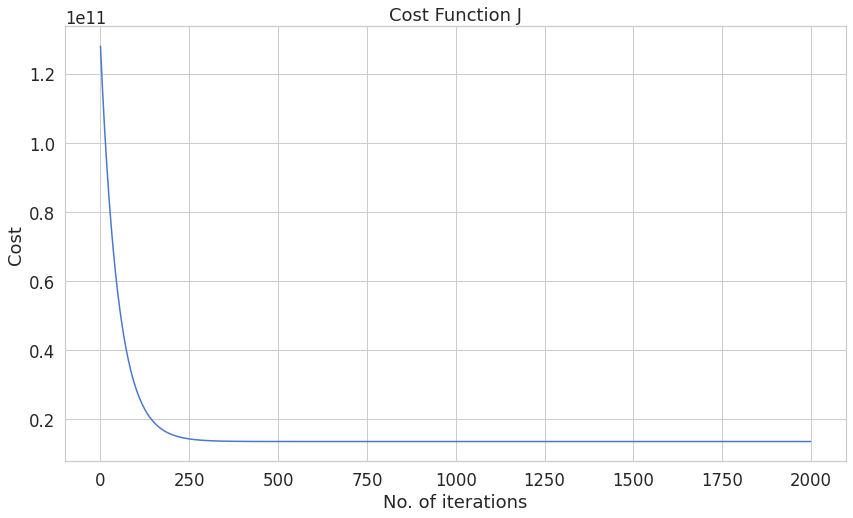

In [98]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['location'])

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['bedrooms'])

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['bathroom'])

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['sqrf'])

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['distance'])

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['buildyear'])

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['tenure'])

In [ ]:
soup = BeautifulSoup(driver.page_source, "lxml")
trans = soup.find(id="transactions")